In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/gdrive')

#라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#데이콘 사이트에서 다운로드한 csv 파일 읽어오기
drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "titanic/train.csv")
test = pd.read_csv(drive_path + "titanic/test.csv")
submission = pd.read_csv(drive_path+"titanic/sample_submission.csv")
print(train.shape, test.shape, submission.shape)

#train  데이터프레임 내용 확인
train.head(3)

#test 데이터프레임 내용 확인
test.head(2)

#submission 제출 파일 양식 확인
submission.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
(891, 12) (418, 11) (418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#train 데이터 프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#train 데이터프레임 통계 정보
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Morley, Mr. William",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


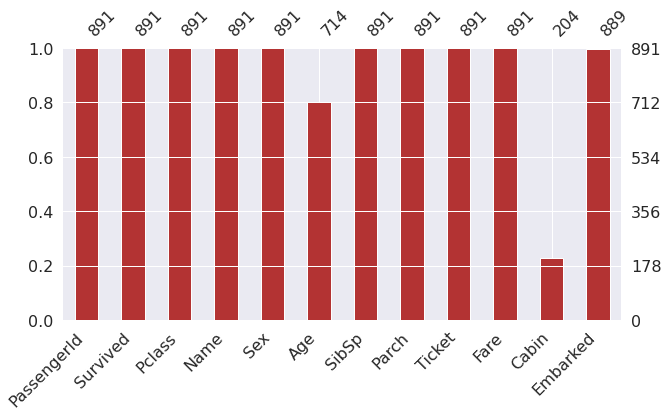

In [ ]:
#결측값 분포
import missingno as msno
msno.bar(train, figsize=(10,5),color=(0.7,0.2,0.2))
plt.show()

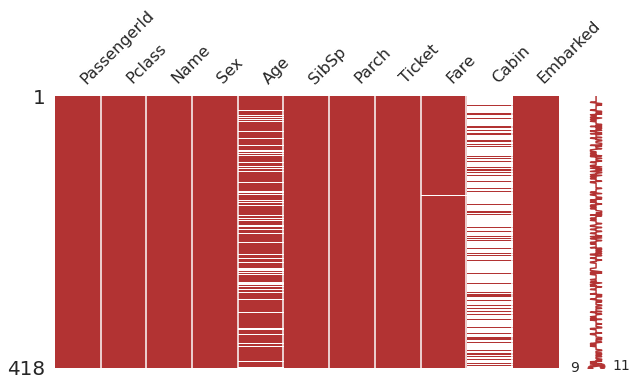

In [ ]:
msno.matrix(test, figsize=(10,5), color = (0.7,0.2,0.2))
plt.show()

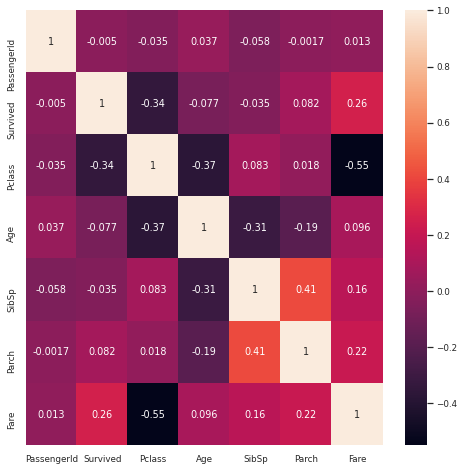

In [ ]:
#숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True,cbar=True);
plt.show()

In [ ]:
#데이터 결합_타이타닉 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train,test],axis=0)
print(data.shape)

(1309, 13)


In [ ]:
#데이터 전처리_숫자형 피처 추출
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]

#결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

#학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features = ['Pclass','Age','SibSp','Parch','Fare']
x_train = data_num.loc[data['TrainSplit']=='Train',selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train','Survived']
X_test = data_num.loc[data['TrainSplit']=='Test',selected_features]

print("Train 데이터셋 크기:",x_train.shape,y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)

Train 데이터셋 크기: (891, 5) (891,)
Test 데이터셋 크기: (418, 5)


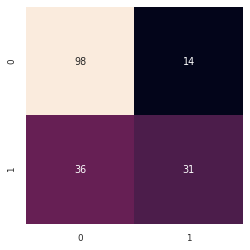

In [ ]:
#훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train,test_size=0.2,shuffle=True,random_state=20)

#로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

#Confusion Matrix 혼동행렬 
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_val_pred),annot=True,cbar=False,square=True)
plt.show()

In [ ]:
#평가지표
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val,y_val_pred))
print("Precision:%.4f" %precision_score(y_val,y_val_pred))
print("Recall:%.4f" %recall_score(y_val,y_val_pred))
print("F1:%.4f" %f1_score(y_val,y_val_pred))
print("AUC:%.4f" %roc_auc_score(y_val,y_val_pred))

Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


In [ ]:
#test 데이터에 대한 예측값 정리
y_test_pred = lr_model.predict(X_test)

#제출 양식에 맞게 정리
submission['Survived']=y_test_pred.astype(int)
#제출파일 저장
submission_filepath = drive_path+'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath,index=False)
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
#타킷 레이블의 분포 확인(결측값 포함, 1이 생존자타킷 레이블의 분포 확인(결측값 포함, 1이 생존자)

train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

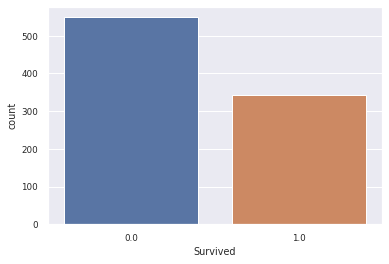

In [ ]:
#객실 등급별 분포 확인
sns.countplot(x='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

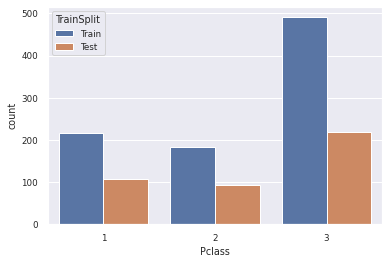

In [ ]:
#train-test데이터 분포
sns.countplot(x='Pclass',hue='TrainSplit',data=data)
plt.show()

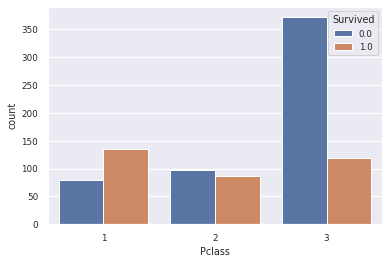

In [ ]:
#Pclass별 Survived 여부
sns.countplot(x='Pclass',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

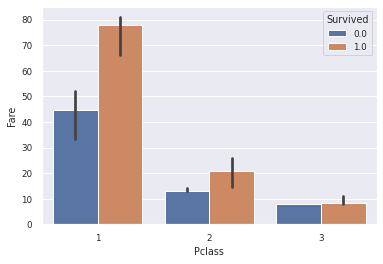

In [ ]:
#Pclass별 Fare 객실 요금의 중간 값 비교
sns.barplot(x='Pclass',y='Fare',hue='Survived',data=data[data['TrainSplit']=='Train'],estimator=np.median)
plt.show( )

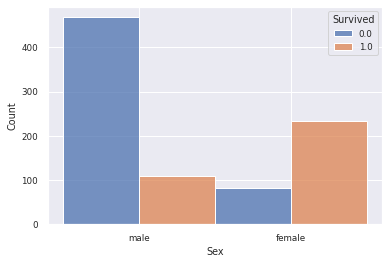

In [ ]:
#hisplot함수-dodge 옵션
sns.histplot(x='Sex',hue='Survived',multiple='dodge',data=data[data['TrainSplit']=='Train'])
plt.show()

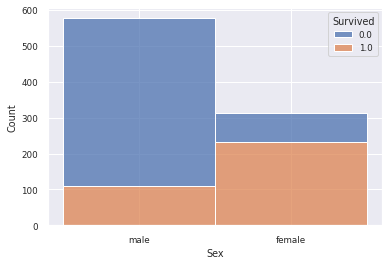

In [ ]:
#hisplot함수-stack옵셥
sns.histplot(x='Sex',hue='Survived',multiple='stack',data=data[data['TrainSplit']=='Train'])
plt.show()

In [ ]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [ ]:
title_name = data['Name'].str.split(",",expand=True)[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [ ]:
title=title_name.str.split(".",expand=True)[0]
title.value_counts(dropna=False)

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Jonkheer          1
 Capt              1
 the Countess      1
 Dona              1
 Lady              1
 Mme               1
 Sir               1
 Don               1
Name: 0, dtype: int64

In [ ]:
title = title.replace(['Ms'],'Miss')
title = title.replace(['Mlle','the Countess', 'Lady','Don','Dona','Mme','Sir','Jonkheer'], 'Noble')
title = title.replace(['Col','Major','Capt'],'Officer')
title = title.replace(['Dr','Rev'],'Priest')
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Jonkheer          1
 Capt              1
 the Countess      1
 Dona              1
 Lady              1
 Mme               1
 Sir               1
 Don               1
Name: Title, dtype: int64

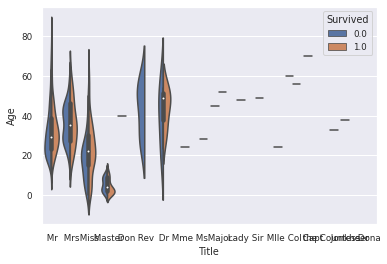

In [ ]:
#승객 나이와 생존 여부와의 관계
sns.violinplot(x='Title', y='Age', hue='Survived',data=data,split=True)
plt.show()

In [ ]:
#결측값 확인 및 대체
for title in data['Title'].unique():
  #결측값 개수 확인
  print("%s 결측값 개수:" %title, data.loc[data['Title']==title,'Age'].isnull().sum())
  #각 Title  중간값으로 대체
  age_med = data.loc[data['Title']==title,'Age'].median()
  data.loc[data['Title']==title,'Age']=data.loc[data['Title']==title,'Age'].fillna(age_med)
#결측값 처리 여부 확인
print("\n")
print("Age 열의 결측값 개수:",data['Age'].isnull().sum())

 Mr 결측값 개수: 0
 Mrs 결측값 개수: 0
 Miss 결측값 개수: 0
 Master 결측값 개수: 0
 Don 결측값 개수: 0
 Rev 결측값 개수: 0
 Dr 결측값 개수: 0
 Mme 결측값 개수: 0
 Ms 결측값 개수: 0
 Major 결측값 개수: 0
 Lady 결측값 개수: 0
 Sir 결측값 개수: 0
 Mlle 결측값 개수: 0
 Col 결측값 개수: 0
 Capt 결측값 개수: 0
 the Countess 결측값 개수: 0
 Jonkheer 결측값 개수: 0
 Dona 결측값 개수: 0


Age 열의 결측값 개수: 0


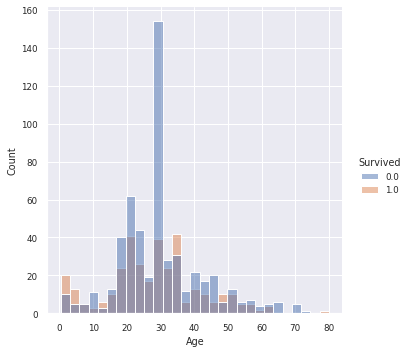

In [ ]:
#Age 분포
sns.displot(x='Age', kind='hist',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

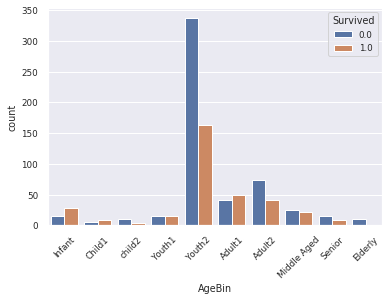

In [ ]:
#Sinning - 구간 나누기
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['Infant','Child1','child2','Youth1','Youth2','Adult1','Adult2','Middle Aged','Senior','Elderly']
data['AgeBin']=pd.cut(data['Age'], bins=bins, labels=labels)

#Age_bin(나이 구간)에 따른 생존율 비교
sns.countplot(x='AgeBin',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

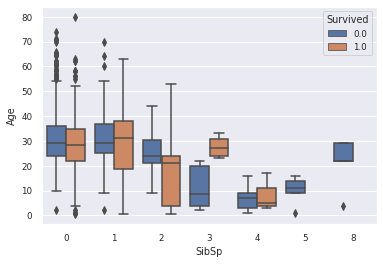

In [ ]:
#형제자매/배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp',y='Age',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

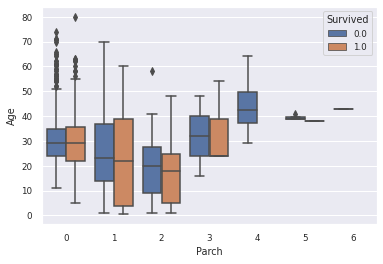

In [ ]:
#부모/자식 수에 따른 승객 나이 및 생존율 관계
sns.boxplot(x='Parch',y='Age',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

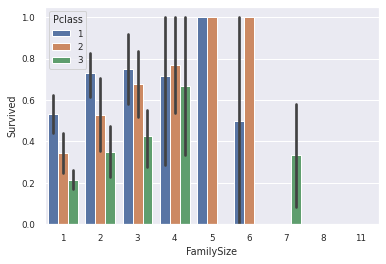

In [ ]:
#가족 구성원의 수
data['FamilySize']=data['SibSp']+data['Parch']+1

#가족 구성원의 수와 생존율 관계
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', estimator=np.mean, data=data[data['TrainSplit']=='Train'])
plt.show()

In [ ]:
#결측값 확인
data.loc[data['Embarked'].isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Train,Miss,Adult2,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Train,Mrs,Senior,1


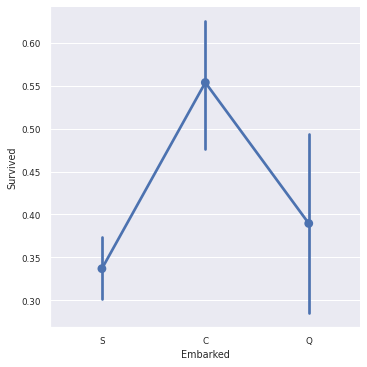

In [ ]:
# 탑승 항구별 생존율 비교
sns.catplot(x='Embarked',y='Survived',kind='point',data=data[data['TrainSplit']=='Train'])
plt.show()

In [ ]:
#고유값 확인
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
#첫 번째 알파벳 이니셜 추출
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

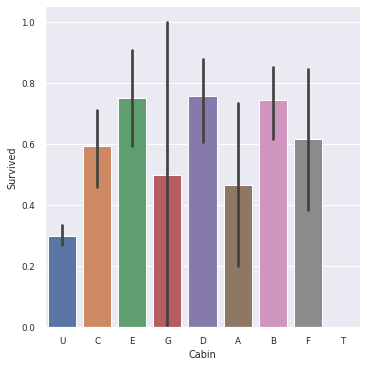

In [ ]:
#알파벳 이니셜로 대체. 결측값은 'U'로 입력
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna('U')

#cabin 구역별 생존율 비교
sns.catplot(x='Cabin',y='Survived',kind='bar',data=data[data['TrainSplit']=='Train'])
plt.show()

In [ ]:
#고유값 확인
data['Ticket'].value_counts(dropna=False)

CA. 2343      11
1601           8
CA 2144        8
3101295        7
PC 17608       7
              ..
A.5. 11206     1
PC 17610       1
367232         1
345780         1
7266           1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
#문자열 정리 - 알파벳 추출
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split('').str[0]
data['Ticket'].value_counts(dropna=True)

    1309
Name: Ticket, dtype: int64

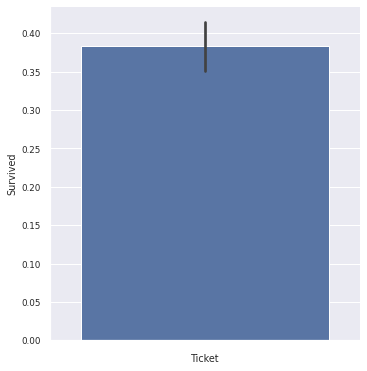

In [ ]:
#문자열이 숫자인 경우 'NUM'으로 대체
data.loc[data['Ticket'].str.isdigit(),'Ticket']='NUM'
data['Ticket'].value_counts(dropna=False)[:10]

#Ticket 번호별 생존율 비교
sns.catplot(x='Ticket', y='Survived', kind='bar',data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=90)
plt.show()